# CSC 59929 
# Praveena Shrestha 
# Assignment 02 

# Collaborated with John Chen 


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap


iris = datasets.load_iris()
y = iris.target

In [14]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max()) 
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=colors[idx],marker=markers[idx], label=cl,edgecolor='black')
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],c='', edgecolor='black', alpha=1.0,linewidth=1, marker='o',s=100, label='test set')

In [15]:
# Tuple of data. (Case, Features, Penalty, C-Value, Iterations, Accuracy)
results=[]

In [16]:
# Helper function
# Plot all various regularization and C values for each case.
# If there are two features, then plot parameter can be set to true.
# Each case will also append data accuracy and iterations data into result.
def logistic_feature_plot(X, X_train, X_test, y_train, y_test, x_label, y_label, features, case, plot=None):
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    X_combined_std = np.vstack((X_train_std, X_test_std))
    y_combined = np.hstack((y_train, y_test))
    
    # Plot case where C_val=100 and Penalty L2
    C_val = 100.0
    lr = LogisticRegression(C=C_val, random_state=1)
    lr.fit(X_train_std, y_train)
    print('Regularization L2 and C={}:'.format(C_val))
    if plot:
        plot_decision_regions(X_combined_std, y_combined,classifier=lr,test_idx=range(105, 150))
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.legend(loc='upper left')
        plt.show()
    print('Accuracy: %.2f' % lr.score(X_test_std, y_test))
    print('Iterations: %i \n' % lr.n_iter_[0])
    results.append((case, features, 'L2', C_val, lr.n_iter_[0], '%.2f' % lr.score(X_test_std, y_test)))
    
    # Plot case where C_val=100 and Penalty L1
    C_val = 1.0
    lr = LogisticRegression(penalty='l2', C=C_val, random_state=1)
    lr.fit(X_train_std, y_train)
    print('Regularization L2 and C={}:'.format(C_val))
    if plot:
        plot_decision_regions(X_combined_std, y_combined,classifier=lr,test_idx=range(105, 150))
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.legend(loc='upper left')
        plt.show()
    print('Accuracy: %.2f' % lr.score(X_test_std, y_test))
    print('Iterations: %i \n' % lr.n_iter_[0])
    results.append((case, features, 'L2', C_val, lr.n_iter_[0], '%.2f' % lr.score(X_test_std, y_test)))
    
    # Plot case where C_val=1.0 and Penalty L2
    C_val = 100.0
    lr = LogisticRegression(penalty='l1', C=C_val, random_state=1)
    lr.fit(X_train_std, y_train)
    print('Regularization L1 and C={}:'.format(C_val))
    if plot:
        plot_decision_regions(X_combined_std, y_combined,classifier=lr,test_idx=range(105, 150))
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.legend(loc='upper left')
        plt.show()
    print('Accuracy: %.2f' % lr.score(X_test_std, y_test))
    print('Iterations: %i \n' % lr.n_iter_[0])
    results.append((case, features, 'L1', C_val, lr.n_iter_[0], '%.2f' % lr.score(X_test_std, y_test)))
    
    # Plot case where C_val=1.0 and Penalty L1
    C_val = 1.0
    lr = LogisticRegression(penalty='l1', C=1.0, random_state=1)
    lr.fit(X_train_std, y_train)
    print('Regularization L1 and C={}:'.format(C_val))
    if plot:
        plot_decision_regions(X_combined_std, y_combined,classifier=lr,test_idx=range(105, 150))
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.legend(loc='upper left')
        plt.show()
    print('Accuracy: %.2f' % lr.score(X_test_std, y_test))
    print('Iterations: %i \n' % lr.n_iter_[0])
    results.append((case, features, 'L1', '1.0', lr.n_iter_[0], '%.2f' % lr.score(X_test_std, y_test)))
    
    return

# All six cases of using two features at a time.
sepal length & sepal width 
sepal length & petal length 
sepal length & petal width 
sepal width & petal length 
sepal width & petal width 
petal length & petal width 


# sepal length & sepal width


In [17]:
X = iris.data[:, [0, 1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Regularization L2 and C=100.0:


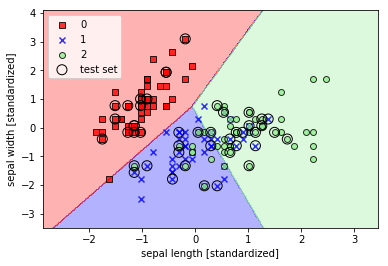

Accuracy: 0.76
Iterations: 9 

Regularization L2 and C=1.0:


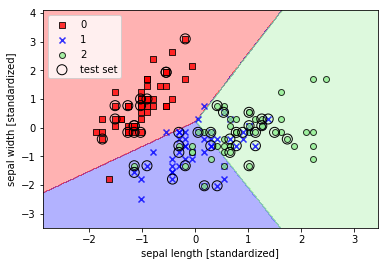

Accuracy: 0.76
Iterations: 6 

Regularization L1 and C=100.0:


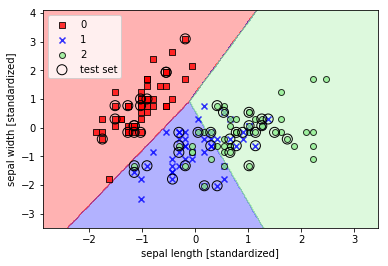

Accuracy: 0.76
Iterations: 26 

Regularization L1 and C=1.0:


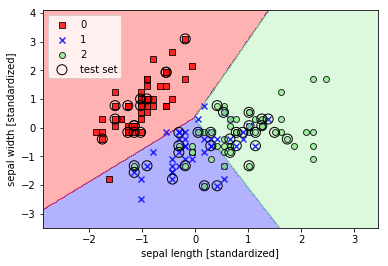

Accuracy: 0.76
Iterations: 12 



In [18]:
x_label = 'sepal length [standardized]'
y_label = 'sepal width [standardized]'
logistic_feature_plot(X, X_train, X_test, y_train, y_test, x_label, y_label, 2, 1, plot=True)

# sepal length & petal length

In [19]:
X = iris.data[:, [0, 2]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Regularization L2 and C=100.0:


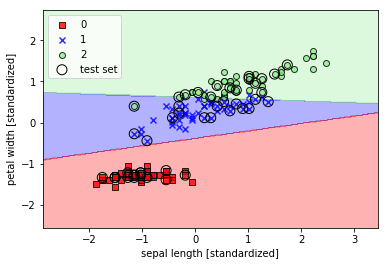

Accuracy: 0.96
Iterations: 9 

Regularization L2 and C=1.0:


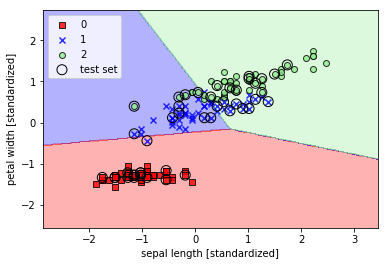

Accuracy: 0.71
Iterations: 5 

Regularization L1 and C=100.0:


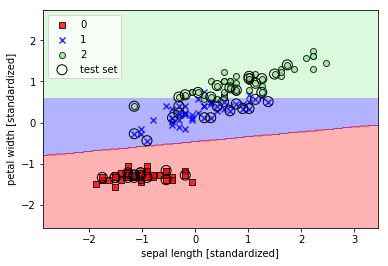

Accuracy: 0.98
Iterations: 34 

Regularization L1 and C=1.0:


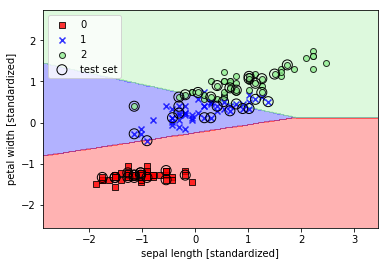

Accuracy: 0.82
Iterations: 19 



In [20]:
x_label = 'sepal length [standardized]'
y_label = 'petal width [standardized]'
logistic_feature_plot(X, X_train, X_test, y_train, y_test, x_label, y_label, 2, 2, plot=True)

# sepal length & petal width

In [21]:
X = iris.data[:, [0, 3]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Regularization L2 and C=100.0:


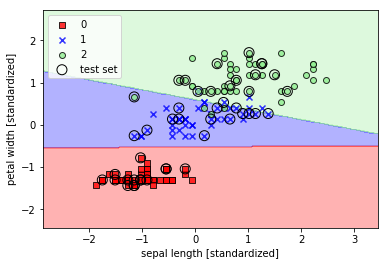

Accuracy: 0.96
Iterations: 8 

Regularization L2 and C=1.0:


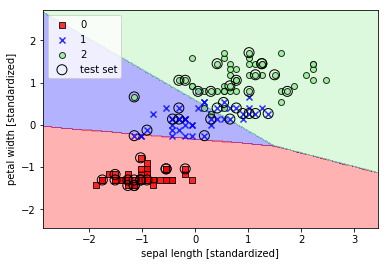

Accuracy: 0.78
Iterations: 5 

Regularization L1 and C=100.0:


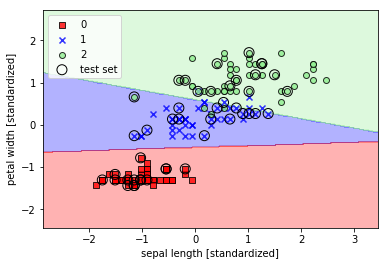

Accuracy: 0.96
Iterations: 19 

Regularization L1 and C=1.0:


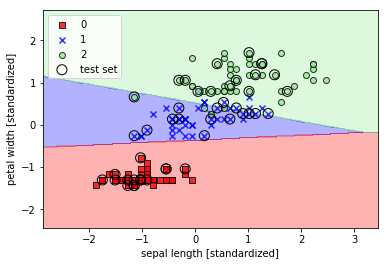

Accuracy: 0.91
Iterations: 17 



In [22]:
x_label = 'sepal length [standardized]'
y_label = 'petal width [standardized]'
logistic_feature_plot(X, X_train, X_test, y_train, y_test, x_label, y_label, 2, 3, plot=True)

# sepal width & petal length

In [23]:
X = iris.data[:, [1, 2]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Regularization L2 and C=100.0:


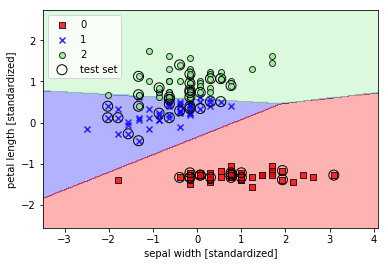

Accuracy: 0.98
Iterations: 8 

Regularization L2 and C=1.0:


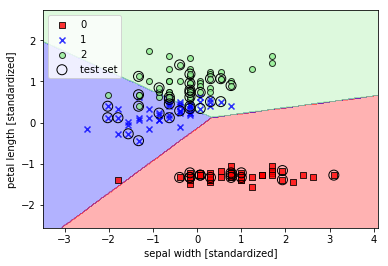

Accuracy: 0.87
Iterations: 6 

Regularization L1 and C=100.0:


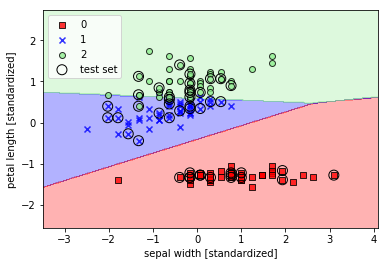

Accuracy: 0.98
Iterations: 32 

Regularization L1 and C=1.0:


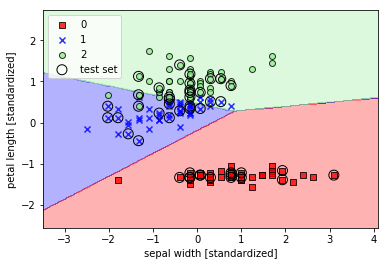

Accuracy: 0.91
Iterations: 19 



In [24]:
x_label = 'sepal width [standardized]'
y_label = 'petal length [standardized]'
logistic_feature_plot(X, X_train, X_test, y_train, y_test, x_label, y_label, 2, 4, plot=True)

# sepal width & petal width

In [25]:
X = iris.data[:, [1, 3]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Regularization L2 and C=100.0:


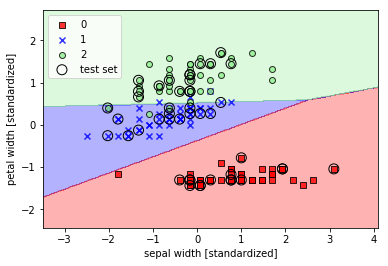

Accuracy: 1.00
Iterations: 8 

Regularization L2 and C=1.0:


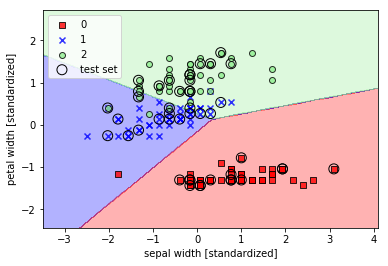

Accuracy: 0.87
Iterations: 6 

Regularization L1 and C=100.0:


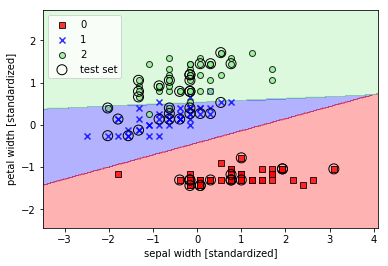

Accuracy: 1.00
Iterations: 25 

Regularization L1 and C=1.0:


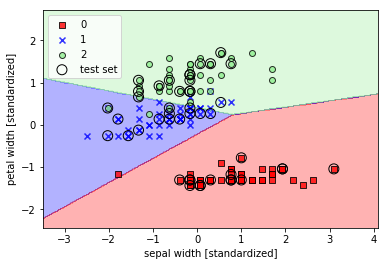

Accuracy: 0.96
Iterations: 19 



In [26]:
x_label = 'sepal width [standardized]'
y_label = 'petal width [standardized]'
logistic_feature_plot(X, X_train, X_test, y_train, y_test, x_label, y_label, 2, 5, plot=True)

# petal length & petal width

In [27]:
X = iris.data[:, [2, 3]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Regularization L2 and C=100.0:


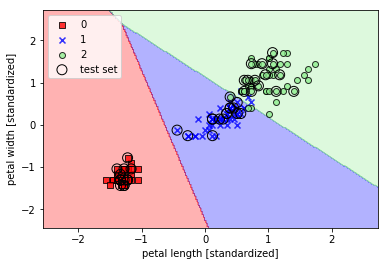

Accuracy: 0.98
Iterations: 9 

Regularization L2 and C=1.0:


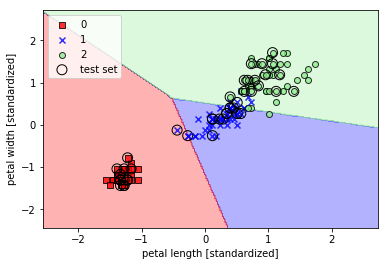

Accuracy: 0.93
Iterations: 6 

Regularization L1 and C=100.0:


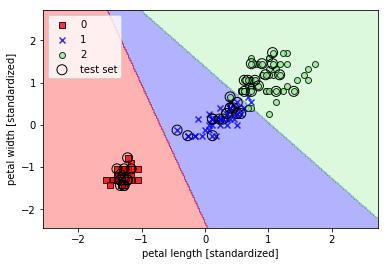

Accuracy: 0.98
Iterations: 39 

Regularization L1 and C=1.0:


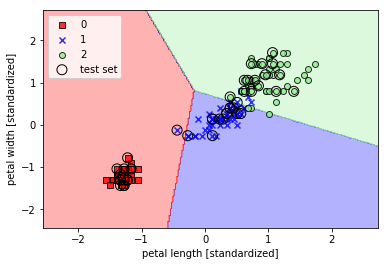

Accuracy: 0.96
Iterations: 21 



In [28]:
x_label = 'petal length [standardized]'
y_label = 'petal width [standardized]'
logistic_feature_plot(X, X_train, X_test, y_train, y_test, x_label, y_label, 2, 6, plot=True)

# All four cases of using three features at a time.
 sepal length, sepal width, and petal length 
 sepal length, sepal width, and petal width 
 sepal length, petal length, and petal width 
 sepal width, petal length, and petal width 

# sepal length, sepal width, and petal length

In [29]:
X = iris.data[:, [0,1,2]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [30]:
logistic_feature_plot(X, X_train, X_test, y_train, y_test, x_label, y_label, 3, 7)

Regularization L2 and C=100.0:
Accuracy: 0.98
Iterations: 9 

Regularization L2 and C=1.0:
Accuracy: 0.78
Iterations: 6 

Regularization L1 and C=100.0:
Accuracy: 0.98
Iterations: 37 

Regularization L1 and C=1.0:
Accuracy: 0.91
Iterations: 20 



# sepal length, sepal width, and petal width

In [31]:
X = iris.data[:, [0,1,3]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [32]:
logistic_feature_plot(X, X_train, X_test, y_train, y_test, x_label, y_label, 3, 8)

Regularization L2 and C=100.0:
Accuracy: 0.96
Iterations: 9 

Regularization L2 and C=1.0:
Accuracy: 0.84
Iterations: 6 

Regularization L1 and C=100.0:
Accuracy: 0.96
Iterations: 24 

Regularization L1 and C=1.0:
Accuracy: 0.93
Iterations: 16 



# sepal length, petal length, and petal width


In [33]:
X = iris.data[:, [0,2,3]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [34]:
logistic_feature_plot(X, X_train, X_test, y_train, y_test, x_label, y_label, 3, 9)

Regularization L2 and C=100.0:
Accuracy: 0.98
Iterations: 9 

Regularization L2 and C=1.0:
Accuracy: 0.80
Iterations: 6 

Regularization L1 and C=100.0:
Accuracy: 0.98
Iterations: 33 

Regularization L1 and C=1.0:
Accuracy: 0.89
Iterations: 23 



# sepal width, petal length, and petal width

In [35]:
X = iris.data[:, [1,2,3]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [36]:
logistic_feature_plot(X, X_train, X_test, y_train, y_test, x_label, y_label, 3, 10)

Regularization L2 and C=100.0:
Accuracy: 0.98
Iterations: 9 

Regularization L2 and C=1.0:
Accuracy: 0.91
Iterations: 6 

Regularization L1 and C=100.0:
Accuracy: 0.98
Iterations: 32 

Regularization L1 and C=1.0:
Accuracy: 0.96
Iterations: 18 



# All features at once 

In [37]:
X = iris.data[:, [0,1,2,3]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [38]:
logistic_feature_plot(X, X_train, X_test, y_train, y_test, x_label, y_label, 4, 11)

Regularization L2 and C=100.0:
Accuracy: 0.98
Iterations: 9 

Regularization L2 and C=1.0:
Accuracy: 0.84
Iterations: 6 

Regularization L1 and C=100.0:
Accuracy: 0.98
Iterations: 31 

Regularization L1 and C=1.0:
Accuracy: 0.96
Iterations: 17 



# Summary of all the results 

In [46]:
print("Case | Features | Penalty | Value C | Iteration | Accuracy")

for case, features, penalty, c_val, iteration, acc in results:
    if (acc == 1.00):
        print(" {:<9} {:<8} {:<8} {:<12} {:<8} {} perfect score".format(case, features, penalty, c_val, iteration, acc))
    else:
        print(" {:<9} {:<8} {:<8} {:<12} {:<8} {}".format(case, features, penalty, c_val, iteration, acc))
    

Case | Features | Penalty | Value C | Iteration | Accuracy
 1         2        L2       100.0        9        0.76
 1         2        L2       1.0          6        0.76
 1         2        L1       100.0        26       0.76
 1         2        L1       1.0          12       0.76
 2         2        L2       100.0        9        0.96
 2         2        L2       1.0          5        0.71
 2         2        L1       100.0        34       0.98
 2         2        L1       1.0          19       0.82
 3         2        L2       100.0        8        0.96
 3         2        L2       1.0          5        0.78
 3         2        L1       100.0        19       0.96
 3         2        L1       1.0          17       0.91
 4         2        L2       100.0        8        0.98
 4         2        L2       1.0          6        0.87
 4         2        L1       100.0        32       0.98
 4         2        L1       1.0          19       0.91
 5         2        L2       100.0        8  

# Table summary with C-Value of 100 and L2 Penalty

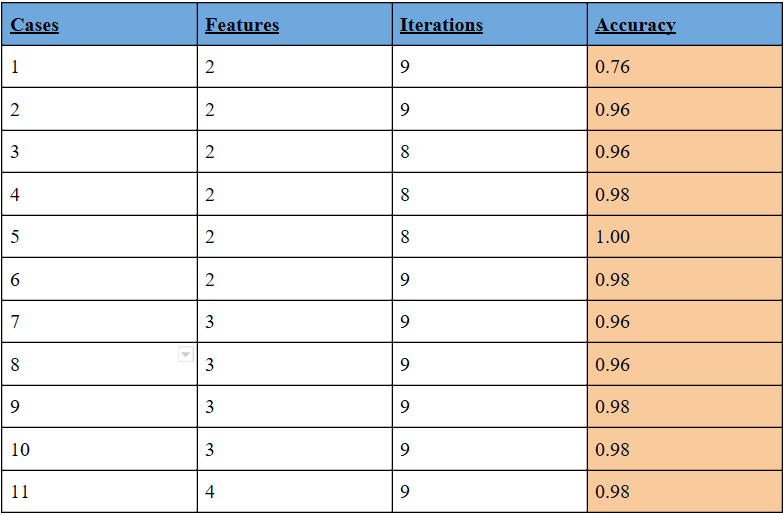

# CONCLUSION